# 1. Breast Cancer Dataset

## Imports

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display as dsp 
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.preprocessing import LabelEncoder as le
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
fig_dir = 'Figures/1/'
df = pd.read_csv('Datasets/breast_cancer_dataset.csv')
display(df.head())
df=df.drop(['Unnamed: 32','id'],axis=1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Radius mean vs Perimeter Mean Scatter Plot

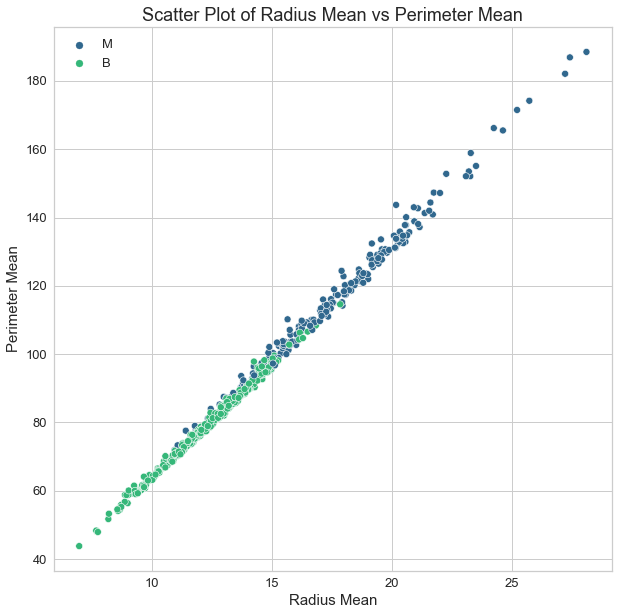

In [5]:
rad_mean = df['radius_mean']
perim_mean =  df['perimeter_mean']
target = df['diagnosis']
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=rad_mean,
    y=perim_mean,
    hue=target,
    legend='auto',
    palette = 'viridis'
)
plt.title('Scatter Plot of Radius Mean vs Perimeter Mean',fontsize=18)
plt.xlabel('Radius Mean', fontsize=15)
plt.ylabel('Perimeter Mean', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.savefig(fig_dir+'scatter_rad_perim_mean.png')
plt.show()


### Radius Mean & Perimeter Mean Pearson Correlation

In [6]:
pearson_corr = df[['radius_mean','perimeter_mean']].corr(method='pearson').values[0,1]
print("Radius Mean and Perimeter Mean Pearson Correlation Coefficient:",pearson_corr)

Radius Mean and Perimeter Mean Pearson Correlation Coefficient: 0.9978552814938109


### KNN Prediction Accuracy

#### Using just Train-Test split

Best number of neigbours 3


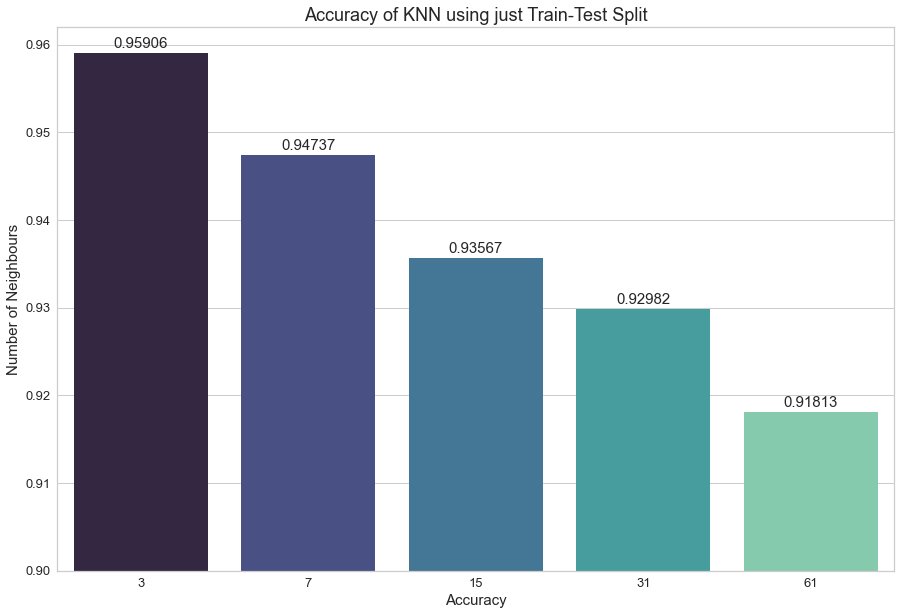

In [7]:
df.diagnosis = df.diagnosis.map({'M':1 , 'B':0})
y = df.diagnosis
X = df.drop('diagnosis' , axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=6) 
accuracies = {}
k_vals = [3,7,15,31,61]
for k in k_vals:
    knn= KNN(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracies[k] = accuracy_score(y_test , y_pred)
accuracy = list(accuracies.values())
neighbours = list(accuracies.keys())
plt.figure(figsize=(15,10))
splot = sns.barplot(
    x=neighbours,
    y=accuracy,
    palette = 'mako'
)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.5f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize = 15        
                  )
plt.ylim([0.9,0.962])
plt.title("Accuracy of KNN using just Train-Test Split",fontsize=18)
plt.ylabel("Number of Neighbours",fontsize=15)
plt.xlabel("Accuracy",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

print("Best number of neigbours",k_vals[accuracy.index(max(accuracy))])
plt.savefig(fig_dir+'1_acc_train_test.png')

#### Using K-Fold Cross Validation

Best number of neigbours 15


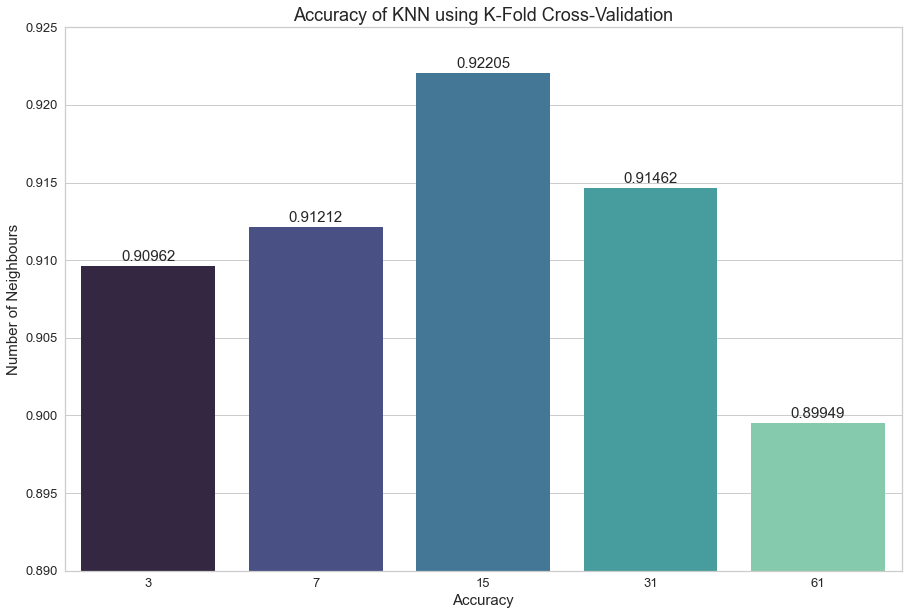

In [8]:
neighbors = []
cv_scores = []
# perform 10 fold cross validation
for k in [3,7,15,31,61]:
    neighbors.append(k)
    knn = KNN(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
plt.figure(figsize=(15,10))
splot = sns.barplot(
    x=neighbours,
    y=cv_scores,
    palette = 'mako'
)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.5f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize = 15
                  )
plt.ylim([0.89,0.925])
plt.title("Accuracy of KNN using K-Fold Cross-Validation",fontsize=18)
plt.ylabel("Number of Neighbours",fontsize=15)
plt.xlabel("Accuracy",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
print("Best number of neigbours",neighbors[cv_scores.index(max(cv_scores))])
plt.savefig(fig_dir+'1_acc_k_fold.png')